import data:

In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('C:\workdir\creditcard.csv')

skálázás ás metadata:

In [8]:
from sklearn.preprocessing import RobustScaler
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
scaler = RobustScaler()

df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

#df = df.sample(frac=1)

#df_fraud = df.loc[df['Class'] == 1]
#df_not_fraud = df.loc[df['Class'] == 0]

#df_normal_dist = pd.concat([df_fraud, df_not_fraud])
#new_df = df_normal_dist.sample(frac=1)
#new_df.head()

In [10]:
df = pd.read_csv('sample.csv')
metadata.detect_from_dataframe(data=df)
metadata.validate()

Conditions:

In [11]:
from sdv.sampling import Condition

frauds = Condition(
    num_rows=25000,
    column_values={'Class': 1}
)

non_frauds = Condition(
    num_rows=25000,
    column_values={'Class': 0}
)

Generate CTGAN

In [12]:
from sdv.single_table import CTGANSynthesizer

ctgan_synthesizer = CTGANSynthesizer(metadata, verbose=True)
ctgan_synthesizer.fit(df)


Epoch 1, Loss G: -1.4794,Loss D:  0.2063
Epoch 2, Loss G: -2.1036,Loss D: -0.0133
Epoch 3, Loss G: -2.5803,Loss D: -0.1022
Epoch 4, Loss G: -2.5255,Loss D:  0.0803
Epoch 5, Loss G: -1.2741,Loss D: -0.4458
Epoch 6, Loss G:  0.0558,Loss D: -0.7429
Epoch 7, Loss G:  0.3777,Loss D: -1.0088
Epoch 8, Loss G: -0.4839,Loss D: -0.3433
Epoch 9, Loss G: -1.6322,Loss D:  0.3206
Epoch 10, Loss G: -2.4655,Loss D:  0.0431
Epoch 11, Loss G: -2.6830,Loss D: -0.0521
Epoch 12, Loss G: -2.1668,Loss D: -0.0486
Epoch 13, Loss G: -2.6202,Loss D: -0.2302
Epoch 14, Loss G: -2.4615,Loss D:  0.0581
Epoch 15, Loss G: -3.1105,Loss D: -0.3330
Epoch 16, Loss G: -2.8015,Loss D: -0.1860
Epoch 17, Loss G: -2.4697,Loss D: -0.0651
Epoch 18, Loss G: -3.6391,Loss D:  0.0050
Epoch 19, Loss G: -3.0383,Loss D:  0.1871
Epoch 20, Loss G: -3.3636,Loss D: -0.1270
Epoch 21, Loss G: -3.4651,Loss D: -0.0276
Epoch 22, Loss G: -3.6833,Loss D: -0.1691
Epoch 23, Loss G: -3.6243,Loss D:  0.0367
Epoch 24, Loss G: -3.9215,Loss D: -0.0778
E

In [13]:
"""ctgan_synthesizer.save(
    filepath='ctgan_synthesizer.pkl'
)"""
ctgan_df = ctgan_synthesizer.sample_from_conditions(conditions=[frauds,non_frauds])
ctgan_df.head()

Sampling conditions: 100%|██████████| 50000/50000 [03:30<00:00, 237.59it/s] 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-3.004166,1.553983,-4.902412,7.781767,-1.173066,-0.247222,-1.323650,0.816900,-2.932184,-5.063948,...,0.113236,1.350158,-0.483855,-1.081798,0.079257,0.677962,0.089240,1,0.292878,-0.550940
1,-1.103366,1.402779,0.900842,-0.403137,0.442904,-0.317707,0.378138,0.733018,-0.936968,-1.091090,...,0.767654,0.014579,-0.260067,-0.197938,0.325773,0.036699,0.157393,1,0.131725,-0.281209
2,0.731442,1.214484,0.443256,1.431620,-0.281136,-1.111645,0.779807,-0.076216,0.101163,-0.678142,...,0.853359,-0.119924,-0.587282,0.724929,0.034689,0.605128,0.171513,1,-0.179150,0.828858
3,-11.579476,4.563676,-3.340120,6.919636,0.320163,-0.528242,-4.009040,2.177230,-6.053219,-1.453836,...,-1.514652,0.765506,0.107788,1.059198,0.267527,0.814666,0.828261,1,0.345012,-0.029775
4,-1.150440,1.234024,0.911230,6.706386,0.381219,-0.045993,0.421021,0.423244,-4.892911,-0.603586,...,0.349529,-0.386453,-0.050165,0.008321,-0.571230,-0.267748,0.087943,1,-0.209839,-0.915107


Load CTGAN

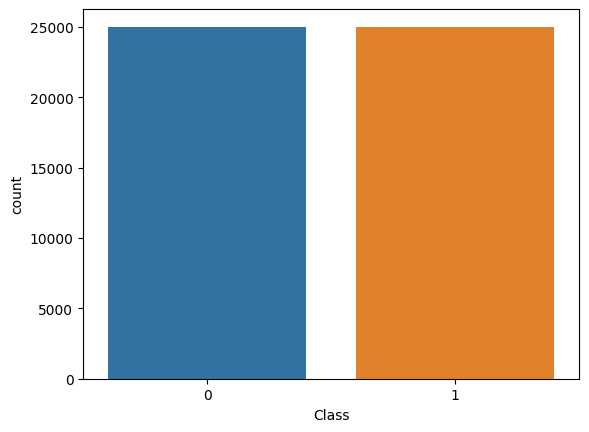

In [14]:
import pickle
import io
import torch

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

"""#contents = pickle.load(f) becomes...
ctgan_synthesizer = CPU_Unpickler(open("ctgan_synthesizer.pkl", "rb")).load()

#ctgan_synthesizer = CTGANSynthesizer.load(
#    filepath='ctgan_synthesizer.pkl', map_location='cpu'
#)
ctgan_df = ctgan_synthesizer.sample(1000)
ctgan_df.head()
"""
import matplotlib.pyplot as plt
import seaborn as sns

#print('Csalas: ', ctgan_df['Class'].value_counts()[1])
#print('Nem csalas: ', ctgan_df['Class'].value_counts()[0])
sns.countplot(x=ctgan_df['Class'])
plt.show()


TVAE:

Sampling conditions: 100%|██████████| 50000/50000 [12:33<00:00, 66.33it/s]  


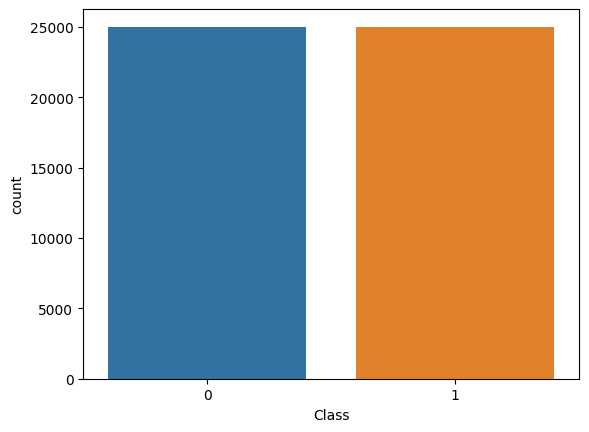

In [15]:
from sdv.single_table import TVAESynthesizer

tvae_synthesizer = TVAESynthesizer(metadata)
tvae_synthesizer.fit(df)
"""
tvae_synthesizer.save(
    filepath='tvae_synthesizer.pkl'
)"""
tvae_df = tvae_synthesizer.sample_from_conditions(conditions=[frauds,non_frauds])
tvae_df.head()
sns.countplot(x=tvae_df['Class'])
plt.show()

TVAE load:

In [16]:
"""tvae_synthesizer = TVAESynthesizer.load(
    filepath='tvae_synthesizer.pkl'
)
tvae_synthesizer = CPU_Unpickler(open("tvae_synthesizer.pkl", "rb")).load()

tvae_df = tvae_synthesizer.sample_from_conditions(conditions=[frauds,non_frauds])
tvae_df.head()"""

'tvae_synthesizer = TVAESynthesizer.load(\n    filepath=\'tvae_synthesizer.pkl\'\n)\ntvae_synthesizer = CPU_Unpickler(open("tvae_synthesizer.pkl", "rb")).load()\n\ntvae_df = tvae_synthesizer.sample_from_conditions(conditions=[frauds,non_frauds])\ntvae_df.head()'

Evaluate the two synthetic dataframes:

In [17]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_ctgan = evaluate_quality(
    real_data=df,
    synthetic_data=ctgan_df,
    metadata=metadata)

Creating report: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]



Overall Quality Score: 89.4%

Properties:
Column Shapes: 83.51%
Column Pair Trends: 95.29%


In [18]:
quality_report_tvae = evaluate_quality(
    real_data=df,
    synthetic_data=tvae_df,
    metadata=metadata)

Creating report: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]



Overall Quality Score: 86.56%

Properties:
Column Shapes: 80.23%
Column Pair Trends: 92.89%


In [19]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=ctgan_df,
    column_name='time_scaled',
    metadata=metadata
)
    
fig.show()

In [20]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=tvae_df,
    column_name='time_scaled',
    metadata=metadata
)
    
fig.show()

Korreláció:

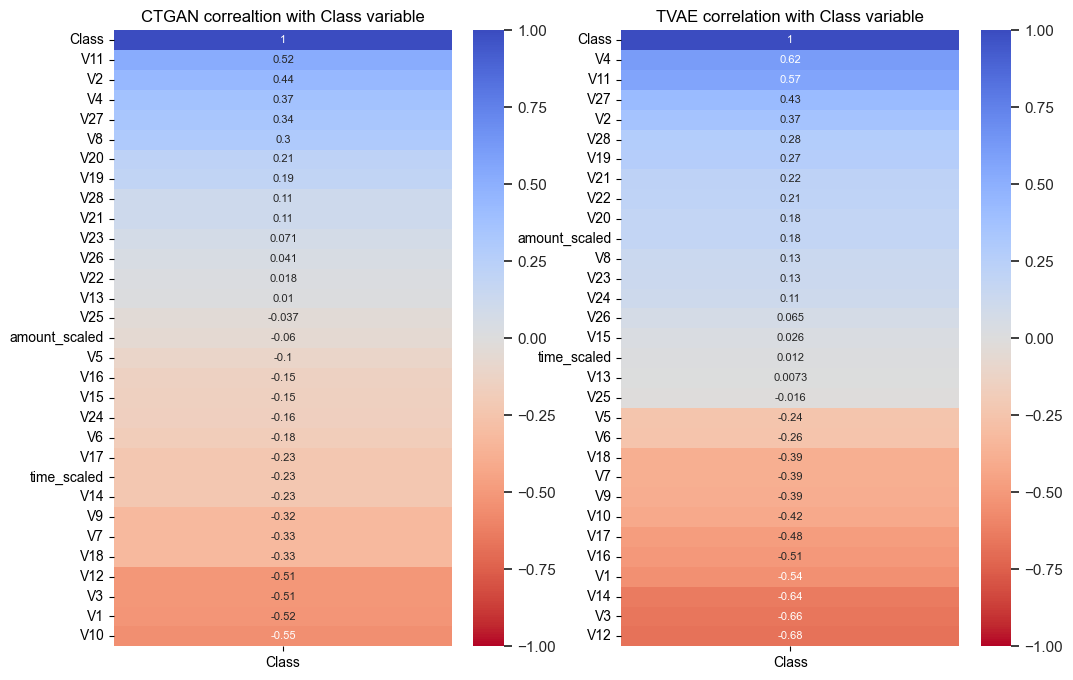

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
sns.set(font_scale=0.6)
sns.set (rc = {'figure.figsize':(6, 8)})
ax1.set_title('CTGAN correaltion with Class variable')
sns.heatmap(ctgan_df.corr()[['Class']].sort_values(by='Class', ascending=False),vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, cmap='coolwarm_r',ax=ax1)
ax2.set_title('TVAE correlation with Class variable')
sns.heatmap(tvae_df.corr()[['Class']].sort_values(by='Class', ascending=False),vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, cmap='coolwarm_r', ax=ax2)
plt.show()

Training:

In [23]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_ctgan = ctgan_df.drop('Class', axis=1)
y_ctgan = ctgan_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X_ctgan, y_ctgan, test_size=0.2)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
print(Counter(y_train))
print(Counter(y_test))

Length of X (train): 40000 | Length of y (train): 40000
Length of X (test): 10000 | Length of y (test): 10000
Counter({1: 20059, 0: 19941})
Counter({0: 5059, 1: 4941})


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

logreg_ctgan = LogisticRegression(n_jobs=-1)
dectree_ctgan = DecisionTreeClassifier()
svc_ctgan = LinearSVC()
knear_ctgan = KNeighborsClassifier(n_jobs=-1)

In [25]:
logreg_ctgan.fit(X_train, y_train)
dectree_ctgan.fit(X_train,y_train)
svc_ctgan.fit(X_train,y_train)
knear_ctgan.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [26]:
from sklearn.metrics import accuracy_score

logreg_pred = logreg_ctgan.predict(X_test)
svc_pred = svc_ctgan.predict(X_test)
dectree_pred = dectree_ctgan.predict(X_test)
knear_pred = knear_ctgan.predict(X_test)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test, svc_pred))
print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test, dectree_pred))
print("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9121
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.9107
A Döntési fa modellünk pontossági pontszáma jelenleg:  0.883
A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg:  0.9085


In [27]:
X_tvae = tvae_df.drop('Class', axis=1)
y_tvae = tvae_df['Class']
X_train_tvae, X_test_tvae, y_train_tvae, y_test_tvae = train_test_split(X_tvae, y_tvae, test_size=0.2)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
print(Counter(y_train))
print(Counter(y_test))

Length of X (train): 40000 | Length of y (train): 40000
Length of X (test): 10000 | Length of y (test): 10000
Counter({1: 20059, 0: 19941})
Counter({0: 5059, 1: 4941})


In [28]:
logreg_tvae = LogisticRegression(n_jobs=-1)
dectree_tvae = DecisionTreeClassifier()
svc_tvae = LinearSVC()
knear_tvae = KNeighborsClassifier(n_jobs=-1)

logreg_tvae.fit(X_train_tvae, y_train_tvae)
dectree_tvae.fit(X_train_tvae,y_train_tvae)
svc_tvae.fit(X_train_tvae,y_train_tvae)
knear_tvae.fit(X_train_tvae,y_train_tvae)

logreg_pred = logreg_tvae.predict(X_test_tvae)
svc_pred = svc_tvae.predict(X_test_tvae)
dectree_pred = dectree_tvae.predict(X_test_tvae)
knear_pred = knear_tvae.predict(X_test_tvae)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, svc_pred))
print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, dectree_pred))
print("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9879
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.9882
A Döntési fa modellünk pontossági pontszáma jelenleg:  0.98
A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg:  0.9875


RandomizedSearchCV:

In [29]:
from sklearn.model_selection import RandomizedSearchCV


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = RandomizedSearchCV(LogisticRegression(n_jobs=-1), log_reg_params)
grid_log_reg.fit(X_train_tvae, y_train_tvae)
print(grid_log_reg.best_params_)
logreg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1), knears_params)
grid_knears.fit(X_train_tvae, y_train_tvae)
print(grid_knears.best_params_)
knear = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {"penalty": ['l1', 'l2'], 'C': [0.5, 0.7, 0.9, 1]}
grid_svc = RandomizedSearchCV(LinearSVC(), svc_params)
grid_svc.fit(X_train_tvae, y_train_tvae)
print(grid_svc.best_params_)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_tvae, y_train_tvae)
print(grid_tree.best_params_)

# tree best estimator
dectree = grid_tree.best_estimator_

{'penalty': 'l2', 'C': 0.1}
{'n_neighbors': 3, 'algorithm': 'auto'}
{'penalty': 'l2', 'C': 0.5}
{'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}


In [30]:
logreg_pred = logreg.predict(X_test_tvae)
svc_pred = svc.predict(X_test_tvae)
dectree_pred = dectree.predict(X_test_tvae)
knear_pred = knear.predict(X_test_tvae)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, svc_pred))
print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, dectree_pred))
print("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(y_test_tvae, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9876
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.988
A Döntési fa modellünk pontossági pontszáma jelenleg:  0.9636
A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg:  0.9875


In [31]:
from sklearn.metrics import classification_report
print("Logreg: ")
print(classification_report(y_test_tvae,logreg_pred))
print("SVC: ")
print(classification_report(y_test_tvae,svc_pred))
print("Knear: ")
print(classification_report(y_test_tvae,knear_pred))
print("dectree: ")
print(classification_report(y_test_tvae,dectree_pred))

Logreg: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4987
           1       0.99      0.99      0.99      5013

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

SVC: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4987
           1       0.99      0.99      0.99      5013

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Knear: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4987
           1       0.99      0.98      0.99      5013

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     100

In [32]:
from sklearn.metrics import roc_auc_score

logreg_pred = logreg.decision_function(X_test_tvae)
svc_pred = svc.decision_function(X_test_tvae)
dectree_pred = dectree.predict_proba(X_test_tvae)
knear_pred = knear.predict_proba(X_test_tvae)


print('Logistic Regression: ', roc_auc_score(y_test_tvae, logreg_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test_tvae, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test_tvae, dectree_pred[:,1]))
print('KNears Neighbors: ', roc_auc_score(y_test_tvae, knear_pred[:,1]))

Logistic Regression:  0.9987481915377747
Support Vector Classifier:  0.9987542315786054
Decision Tree Classifier:  0.9824108010970154
KNears Neighbors:  0.9944953827887877


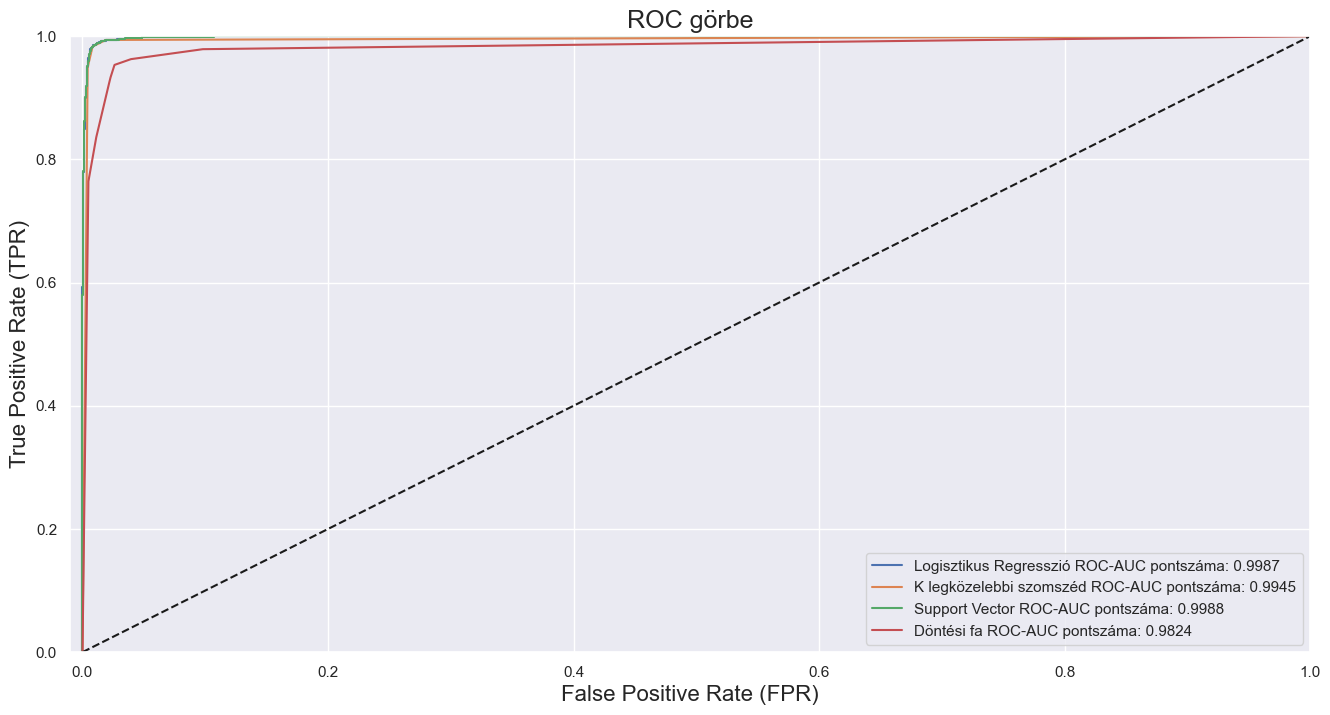

In [33]:
from sklearn.metrics import roc_curve
log_fpr, log_tpr, log_thresold = roc_curve(y_test_tvae, logreg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test_tvae, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test_tvae, dectree_pred[:,1])
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test_tvae, knear_pred[:,1])

def graph_roc_curve_multiple(log_fpr, log_tpr,knear_fpr, knear_tpr, svc_fpr, svc_tpr,tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC görbe', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logisztikus Regresszió ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(y_test_tvae, logreg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='K legközelebbi szomszéd ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(y_test_tvae, knear_pred[:,1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(y_test_tvae, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Döntési fa ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(y_test_tvae, dectree_pred[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
   
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

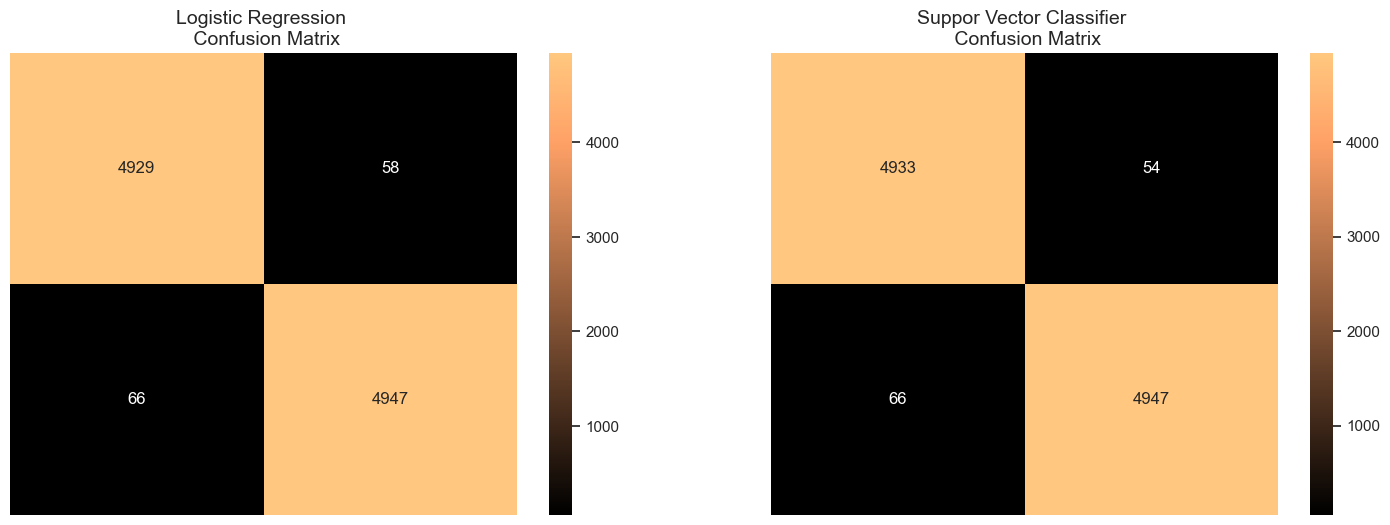

In [34]:
from sklearn.metrics import confusion_matrix

y_pred_logreg = logreg.predict(X_test_tvae)
y_pred_svc = svc.predict(X_test_tvae)


log_reg_cf = confusion_matrix(y_test_tvae, y_pred_logreg)
svc_cf = confusion_matrix(y_test_tvae, y_pred_svc)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1, annot=True,fmt='g', cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax2, annot=True,fmt='g', cmap=plt.cm.copper)
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

[[281983   2332]
 [    64    428]]
[[282149   2166]
 [    67    425]]


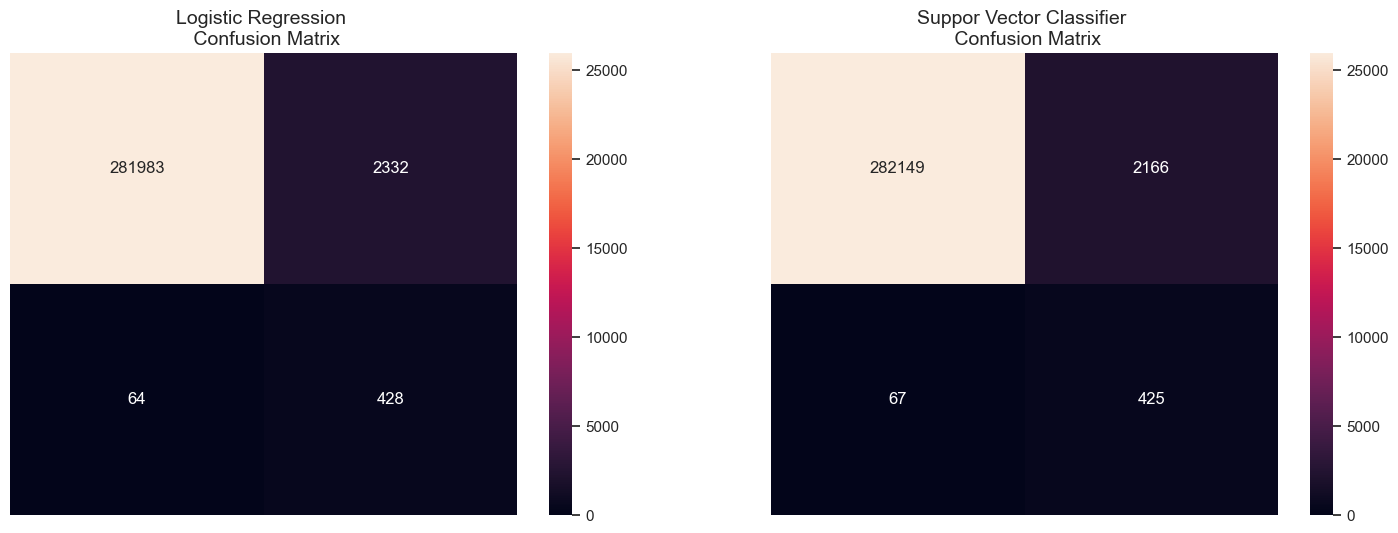

In [35]:
from sklearn.metrics import confusion_matrix

y_pred_logreg_original = logreg.predict(X)
y_pred_svc_original = svc.predict(X)


log_reg_cf = confusion_matrix(y, y_pred_logreg_original)
svc_cf = confusion_matrix(y, y_pred_svc_original)

print(log_reg_cf)
print(svc_cf)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1,vmin=0, vmax=26000, annot=True, fmt='g')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=8, rotation=360)

sns.heatmap(svc_cf, ax=ax2,vmin=0,vmax=26000, annot=True, fmt='g')
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=8, rotation=360)

plt.show()

In [36]:
print(classification_report(y,y_pred_logreg_original))
print(classification_report(y,y_pred_svc_original))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.16      0.87      0.26       492

    accuracy                           0.99    284807
   macro avg       0.58      0.93      0.63    284807
weighted avg       1.00      0.99      0.99    284807

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.16      0.86      0.28       492

    accuracy                           0.99    284807
   macro avg       0.58      0.93      0.64    284807
weighted avg       1.00      0.99      0.99    284807



In [38]:
from sklearn.metrics import recall_score, f1_score, precision_score

print(roc_auc_score(y,y_pred_logreg_original))
print(roc_auc_score(y,y_pred_svc_original))


0.9308582645293945
0.9281014137674217
